# 1A.algo - Spectral Clustering

On veut couper un graphe en deux en coupant le moindre d'arcs possible. C'est un algorithme de [clustering](https://en.wikipedia.org/wiki/Cluster_analysis).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Un graphe

Les données contiennent deux dictionnaires :

* ``noeuds[i]`` : contient la valeur associée au noeud ``i``
* ``arcs`` : si le dictionnaire contient le tuple ``(i,j)``, alors les noeuds ``i`` et ``j`` sont reliés.

In [2]:
# tutoriel_graphe
noeuds = {0: 'le', 1: 'silences', 2: 'quelques', 3: '\xe9crit', 4: 'non-dits.', 5: 'Et', 6: 'risque', 7: '\xe0', 8: "qu'elle,", 9: 'parfois', 10: 'aim\xe9', 11: 'lorsque', 12: 'que', 13: 'plus', 14: 'les', 15: 'Minelli,', 16: "n'oublierai", 17: 'je', 18: 'prises', 19: 'sa', 20: 'la', 21: 'jeune,', 22: "qu'elle,", 23: '\xe0', 24: 'ont', 25: "j'ai", 26: 'chemin', 27: '\xe9tranger', 28: 'lente', 29: 'de', 30: 'voir', 31: 'quand', 32: 'la', 33: 'recul,', 34: 'de', 35: 'trop', 36: 'ce', 37: 'Je', 38: 'Il', 39: "l'extr\xeame", 40: "J'ai", 41: 'silences,', 42: "qu'elle,", 43: 'le', 44: 'trace,', 45: 'avec', 46: 'seras', 47: 'dire,', 48: 'femme', 49: 'soit'}
arcs   = {(3, 15): None, (46, 47): None, (42, 33): None, (35, 45): None, (1, 14): None, (22, 26): None, (26, 28): None, (43, 29): None, (40, 41): None, (29, 44): None, (17, 3): None, (32, 37): None, (24, 19): None, (46, 34): None, (11, 19): None, (34, 49): None, (22, 2): None, (37, 48): None, (14, 12): None, (3, 10): None, (5, 18): None, (12, 24): None, (34, 32): None, (45, 39): None, (37, 26): None, (33, 45): None, (34, 47): None, (36, 31): None, (29, 47): None, (13, 11): None, (12, 21): None, (2, 16): None, (5, 4): None, (33, 35): None, (28, 49): None, (25, 49): None, (21, 0): None, (3, 13): None, (18, 24): None, (12, 7): None, (13, 15): None, (11, 1): None, (16, 23): None, (37, 45): None, (27, 32): None, (32, 41): None, (8, 24): None, (10, 1): None, (2, 24): None, (24, 11): None, (2, 14): None, (47, 36): None, (48, 39): None, (30, 25): None, (30, 43): None, (15, 14): None, (26, 27): None, (6, 8): None, (20, 10): None, (19, 17): None, (5, 7): None, (44, 25): None, (27, 38): None, (2, 0): None, (3, 18): None, (3, 9): None, (25, 33): None, (42, 48): None, (2, 15): None, (26, 48): None, (26, 38): None, (7, 8): None, (8, 4): None}

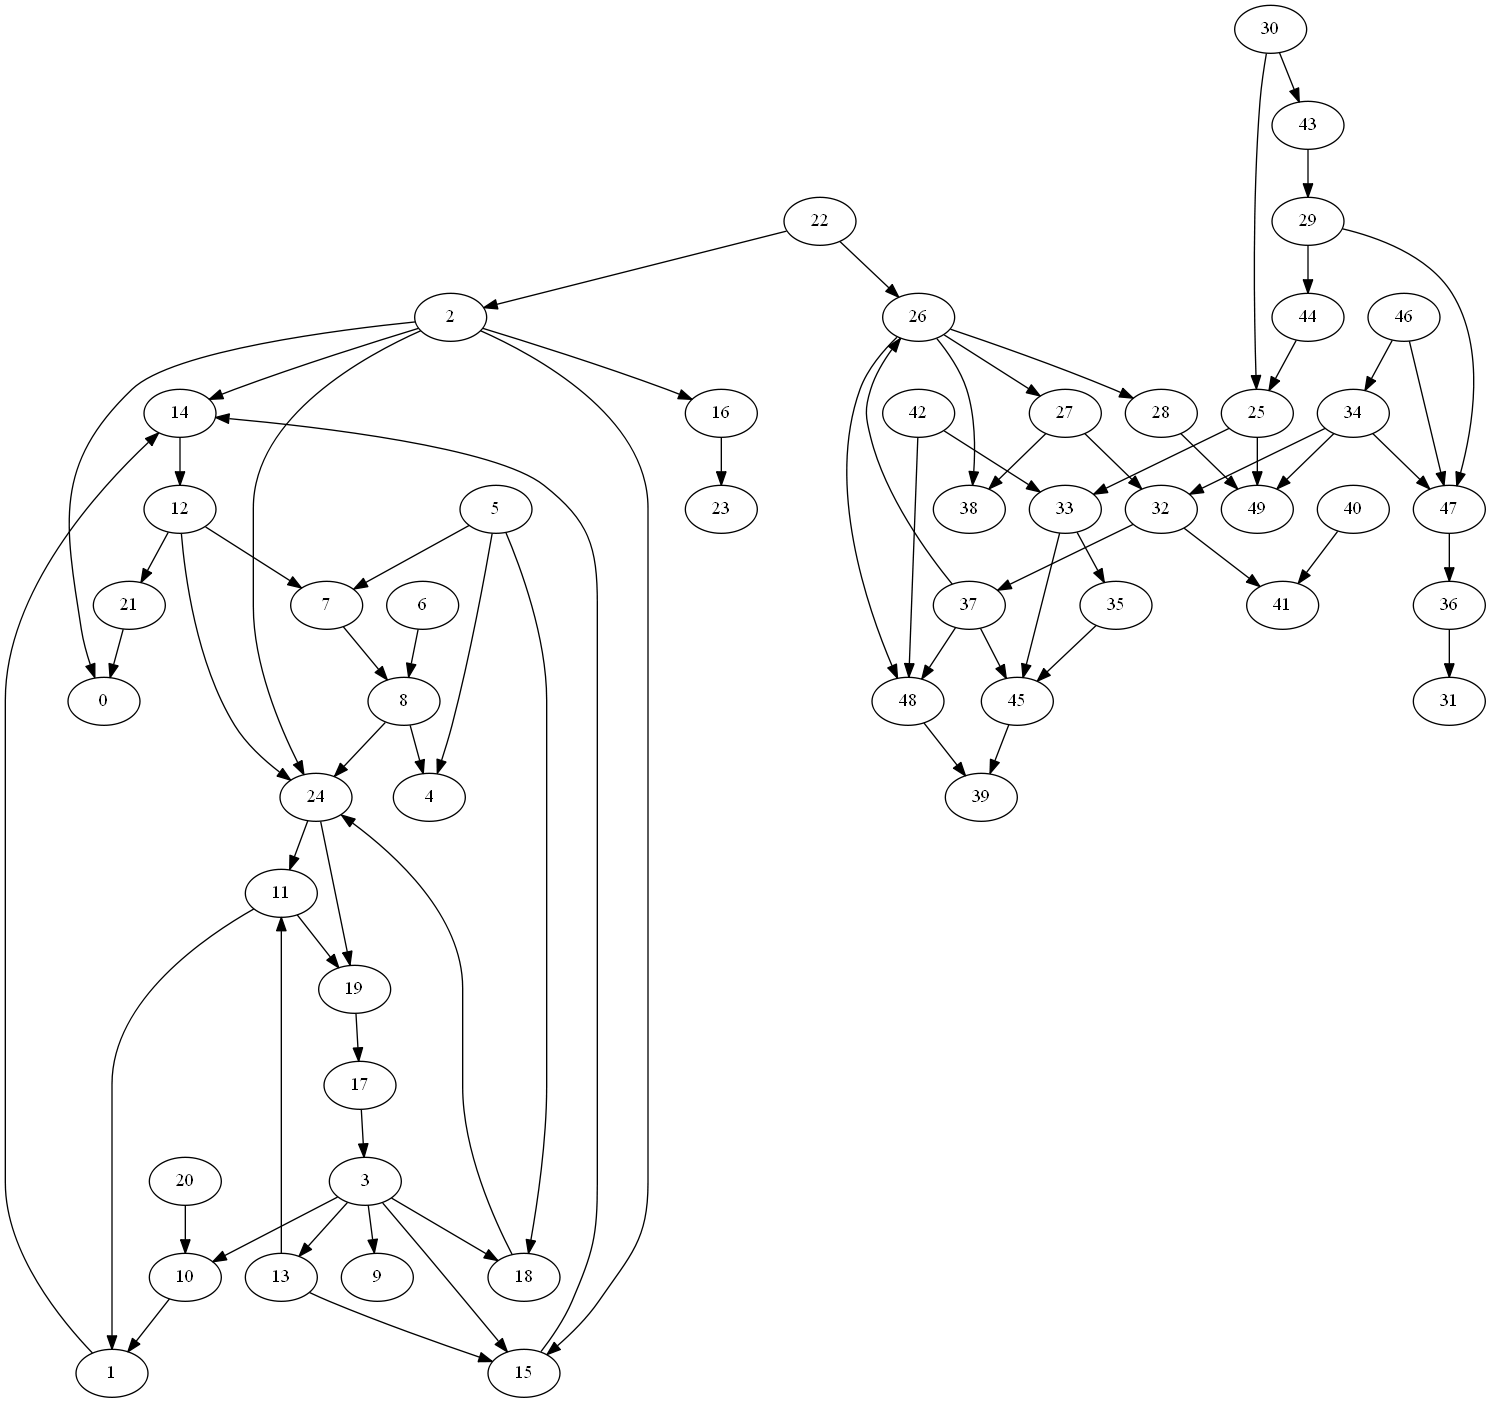

In [3]:
from mlstatpy.graph.graphviz_helper import draw_graph_graphviz
draw_graph_graphviz(noeuds, arcs, "image.png")
from IPython.display import Image
Image("image.png", width=400)

## Partie 1 : clustering en pratique

### Q1

On souhaite obtenir deux composantes connexes en enlevant le minimum d'arcs. Pour cela, on pense à un algorithme appelé [Minimum Spanning Tree](https://fr.wikipedia.org/wiki/Arbre_couvrant_de_poids_minimal). Est-ce que cet algorithme vous satisfait ?

### Q2

On définit le degré d'un noeud comme étant le nombre d'arcs reliés à ce noeud. Ecrire une fonction qui calcule le degré pour un noeud donné.

### Q3

On construit le Laplacien du graphe. C'est une matrice carrée $n\times n$ où $n$ est le nombre de noeuds du graphe. Soit $M=(m_{ij})$ ce laplacien : 

$$m_{ij} = \left \{ \begin{array}{ll} d_i & \text{ si } i = j \\ -1  & \text{ s'il existe un arc reliant } i \text{ et } j \\ 0 & \text{ sinon}  \end{array} \right .$$

Construisez cette matrice. On rappelle que le graphe est toujours non-directionnel. Montrez que la somme des valeurs de chaque colonne est 0.

### Q4

Montrez que l'une des valeurs propres de cette matrice est 0. Quel est le vecteur propre associé ?

*Rappel :* En anglais, valeurs propres et vecteurs propres se traduisent par *eigen values* et *eigen vectors*.

### Q5

Calculez les valeurs propres à l'aide du module [numpy](http://www.numpy.org/). Vous vous assurerez que le résultat théorique précédent est vérifié numériquement.

### Q6

Toutes les valeurs propres sont positives ou nulles, quel est le vecteur propre associé à la plus petite des valeurs propres non nulles ?

### Q7

On classe les noeuds en deux classes selon qu'ils sont associés à une valeur positive ou négative d'après ce vecteur propre. On peut maintenant déterminer quel noeud appartient à la première composante, quel noeud appartient à la seconde. Ecrire une fonction qui calcule le nombre d'arcs qui relient un noeud de la première composante à un noeud de la seconde. Quel est le résultat ?

## Partie 2 : intermède théorique

Les résultats suivants sont extraits du livre [Statistical Analysis of Network Data](http://www.springer.com/fr/book/9780387881454) de *Eric D. Kolaczyk*. $G$ désigne un graphe connexe, avec une seule composante connexe. On définit $S$ un ensemble de sommets du graphe, $\bar{S}$ est son complémentaire. $E(S,\bar{S})$ désigne l'ensemble des arcs qui relient un sommet de $S$ à un sommet de son complémentaire. $|S|$ désigne le nombre de sommets inclus dans $S$. Enfin :

$$\Phi(G) = \min_{|S| \leqslant \frac{|G|} {2} } \frac{ |E (S,\bar{S})|} { |S| }\;\; \textit{(1)}$$

On cherche toujours à couper un graphe connexe en deux composantes connexes en supprimant le moins d'arcs possibles. Cela dit, on souhaite aussi éviter couper un seul sommet du reste du graphe tout simplement parce qu'il est relié par un seul arc. La fonction $\Phi(G)$ exprime ce compromis. 

Résoudre ce problème de minimisation est un problème [NP-complet](https://fr.wikipedia.org/wiki/Probl%C3%A8me_NP-complet) (il n'existe pas d'algorithme capable de résoudre ce problème en un temps polynomial).}. $\lambda_2$ désigne la plus petite des valeurs propres non nulles et $d_{max}$ le plus grand nombre d'arcs reliés au même sommet (degré maximal du graphe). On peut montrer dans ce cas :

$$\frac{\lambda_2}{2} \leqslant \Phi(G) \leqslant \sqrt{ \lambda_2 (2 d_{max} - \lambda_2) }$$

De plus, si $V=(x_1,...x_n)$ le vecteur propre associé à cette valeur propre, on définit $S$ et $\bar{S}$ comme suit :

$$\begin{array}{rcl} S &=& \{ v \in V | x_v > 0 \} \\ \bar{S} &=& \{ v \in V | x_v < 0 \} \end{array}$$

On s'assure que $|S| \leqslant |\bar{S}|$. Alors, on peut montrer que :

$$\Phi(G) \leqslant \frac{ |E (S,\bar{S})|} { |S| } \leqslant \frac{ \Phi^2(G) } { d_{max} } \leqslant \lambda_2$$

Le vecteur $V$ est donc une réponse approchée au problème de minimisation $(1)$.

## Partie 3 : un peu plus loin

On applique cette méthode à un problème de clusterisation.

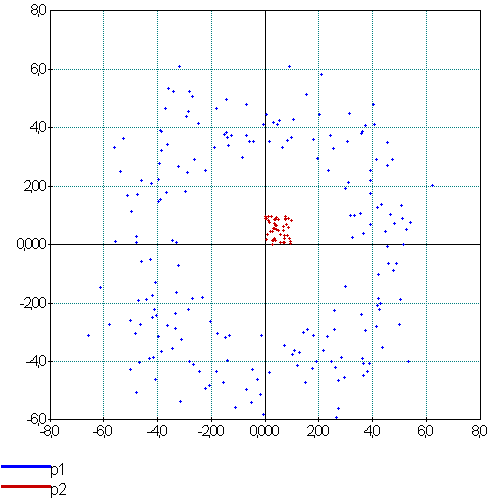

In [4]:
from pyquickhelper.helpgen import NbImage
NbImage("images/tutgraphcl.png")

On note $d(X_1,X_2)$ la distance euclidienne entre deux points $X_1$ et $X_2$. On construit le Laplacien suivant à partir d'un ensemble de points du plan $(X_i)_i$.

$$m_{ij} = \left \{ \begin{array}{ll} -e^{-d(X_i,X_j)^2}  & \text{ si } i \neq j \\ \sum_{i \neq j} e^{-d(X_i,X_j)^2} & \text{ si } i = j \end{array} \right .$$

Et voici un ensemble de points juste au cas où.

In [5]:
points = [(0.84737386691659533, 0.95848816613228727), (0.28893525107454354, 0.66073249195336492), (0.60382037086559148, 0.13747945088383384), (0.21951613156582261, 0.040905525433785228), (0.21613062123493632, 0.096875623632852625), (0.99787588721497178, 0.79337171783327132), (0.18576957348508683, 0.78396225027633837), (0.23875443625588322, 0.35497638429086975), (0.8713637939628045, 0.22983756618811024), (0.28301724069085921, 0.99408996134013161), (0.39792684083973429, 0.77105362865540716), (0.75452041353842147, 0.330325155167562), (0.24824845436118537, 0.95998690078041737), (0.92318434139996397, 0.38115765401571988), (0.54660304309415886, 0.62093667623480242), (0.58899996464290505, 0.9017292023892568), (0.60541336358687847, 0.28929082523865812), (0.87925379747840293, 0.94834058131858756), (0.61449632813730748, 0.94264237081849722), (0.13119804743502139, 0.44158556198130949), (0.20660796942108339, 0.915599021810789), (0.3097131996826511, 0.81979953110332837), (0.89711055197298928, 0.7298496710091944), (0.22499060312661545, 0.072786594549671291), (0.012604758185058018, 0.36199484670070914), (0.92050750708863993, 0.91447248587261709), (0.26304069827339327, 0.026058147250910935), (0.59289937178711172, 0.86673111722782969), (0.70640070176443837, 0.64096733852134291), (0.049399266565914535, 0.54027723332288746), (0.26450585597978316, 0.50883097182669357), (0.91987410679455195, 0.97753050553942622), (0.5618293073273094, 0.27688371997865069), (0.91241761244784847, 0.090310675429991605), (0.90925789663628509, 0.40628594240956295), (0.3832814495252409, 0.66221025722485627), (0.74928785967005418, 0.32840192750838815), (0.25478832731446643, 0.70269825611412617), (0.54293534537395793, 0.87800254191632932), (0.89603330911109724, 0.77106655965183546), (0.29830084404349644, 0.97117954065316903), (0.075137754060910056, 0.086473140735377596), (0.120307047737505, 0.073651360408690802), (0.87835916829742444, 0.34622147871872355), (0.20567119579830373, 0.42658381934346423), (0.27715586337053655, 0.87999487046170488), (0.16364186693234739, 0.98604111274325335), (0.31830209002283116, 0.36372930495109934), (0.73434680601907532, 0.65926820980026724), (0.9830474686174655, 0.12246834322318068), (4.0293130665095358, -3.0529459366329164), (-3.7755737603387041, 2.2685053357046323), (-2.1926920625846602, 2.4857321786911326), (5.1445647965531025, 4.8943143876324848), (0.87403644639763023, 5.6464000746270226), (-3.5545355219233219, 3.8988261206085766), (2.0785612031685732, -1.2948920530351256), (-3.4682717483474708, 2.2364561845005868), (2.0695530720860349, -2.9439062757612424), (3.9563571060210054, -2.0678946581365616), (3.2485209278176157, -2.6386418932454814), (-3.4800728241977779, 0.72646452125011518), (-1.8341241854718167, 3.3482541467971951), (-4.5558692651012178, 3.5624030818263908), (-4.6768285328272157, -1.0106699901361971), (3.9175303893386597, 0.1087117017596031), (-3.9111941479785823, 2.70001353796486), (-5.5501953466420737, -3.8544512068951891), (1.9246058344257151, 4.123740240481137), (-4.110657752575519, -2.0774760107085393), (2.6547967574269418, 4.6868873425221045), (-1.9308254017076039, -2.9448006865754279), (-3.0788555249744247, 3.396205767032443), (-4.0516249434348621, 0.42035392996461629), (-2.2989465364173602, -3.2706795830191275), (4.651698949077459, 1.1364194264447973), (3.3637257964296152, -2.5082040184760555), (-3.2502121678035314, 4.5383631321594571), (4.5274668721202556, 4.473426056956777), (3.400114365788911, -3.0434200740148363), (3.513062501300436, 2.718209259961025), (-2.3986743034356737, -4.0590996420222467), (2.6632346815268289, 4.8894243587379433), (4.2802341564965607, -3.4921791441653762), (-1.5297912885016269, 5.5780900056883569), (4.0634598983096293, -2.2904478604819776), (1.0857595813036722, 5.6366192967000295), (-4.5596385297232223, -1.3177709282351766), (-2.1361714943468244, -3.9107871995830976), (3.7240531749202161, -4.8033709892679886), (-4.1017624989859351, -0.54374796617700816), (2.3715344477591818, -3.2387553898801391), (3.8187172884547076, -5.1522284671097314), (1.0454193728074506, 3.1688190599740418), (-3.9848808505730315, -3.5176013894081675), (-4.1965918931505275, 2.0248869962483522), (3.4535361867324776, 3.4437155145638751), (-3.2171776428648808, -2.0867326734388021), (-3.5763512667620065, -3.785293447306691), (-3.2489915323631275, -4.6589505137265448), (1.2817385669950028, -4.0553290947191964), (-5.5481507299407191, 5.2080477057573553), (-2.2817876881965624, 0.12512408298772948), (-3.4831125975271719, 1.7834950195462245), (-4.2064606598908139, -3.2421411165648886), (-5.3461204499811092, 0.65966593807378215), (-0.36559473517464181, -3.9248327086099932), (-4.4223418217602317, 4.790875007038224), (-3.9026572243192548, -0.21621909226838504), (0.16100173690141428, -4.8875278273011942), (-4.2792213808538602, 1.9041297697847308), (-4.4298318748123444, -3.8717874765920124), (3.2660121035644738, 3.8922848961161609), (4.4724681658043082, -1.8875314666371643), (-3.1337207059785208, 7.2290596706950154), (5.0970619686963916, 2.4188864705446997), (-1.824501293502089, 0.87811217547665232), (2.6141377553638456, 2.4736768016729647), (-3.9646033676482686, 1.7291507868196327), (-5.6494860793108481, -1.1744278681124489), (3.3291564189715617, 3.1892910878432268), (2.6260111359196396, -4.8029748349762125), (-4.1110554486386404, 0.0087017311510849682), (-3.812034605848817, 1.8310006567642712), (-4.0643824785110239, 4.7806635726760689), (-3.8724397920934015, 0.65927045141188367), (-3.6202135060380289, -0.18281430910806151), (1.8134764145891591, -4.0328054369849538), (4.0315824591034124, -3.5339867923196042), (-3.0906912982614791, -3.8390710019489158), (0.77019164393866146, 4.0099320163703895), (-3.2239134319849398, 2.5227757084315567), (-2.5342615497190861, -4.5402720724503229), (0.52313297572359074, 5.8268409663350287), (-2.0896974241486603, -0.83931337455192145), (5.9824769771009292, 1.8062615072223389), (-1.7151819974072808, -4.6553638508191835), (-0.94296691141453703, -4.3332773280899097), (-2.9080659785364102, 3.8017876981653527), (-4.146797854411842, -2.4943345068020939), (-1.6135304662636716, -4.5968234340599352), (-5.2240732422979015, -0.40050907128273239), (3.0003615064702411, 4.3564534485947091), (1.5251603471425388, 5.3602495377614252), (0.70829180528117897, 4.8705912438690024), (-1.9857439387875215, 4.3495410597763557), (-1.7415118623160484, -2.8482449535792851), (3.1227029816875906, -3.943690794192229), (2.5533372938495322, 0.23654193364300019), (4.9320538122814632, 0.27398085527961841), (3.5379571426787906, 3.5479478416595258), (-3.9952197756192462, 0.9519866242123729), (-0.63418929807710789, 4.9714021509147459), (3.7514419719026835, -3.7952656655539831), (5.8168652955867248, -5.8059389896821614), (-3.86083201462211, 1.6763339473293351), (5.2346287443442741, -2.0049022214331869), (3.0159172780756807, -4.6747832401686313), (1.9625789720275502, 0.21332969214064601), (-5.4459656516053521, 1.8490131071943328), (5.4887755131556295, 1.0537691340713213), (4.1214658457920255, 1.8180419262808878), (1.0417225435808637, 6.4876076903545457), (5.2056831059665383, 3.4403227294912879), (-3.29183542445509, 1.1299087065549616), (-4.6894950904308068, 0.67877427899602139), (-4.2334935303450196, 0.66692066781151726), (6.918359229911677, -0.43825691963852248), (5.0912552685819197, 5.9256467457380193), (3.9995400634925016, -4.2633779062253305), (-1.3270510253578853, -2.8998811026998816), (-3.4372749748248483, -2.800876689538256), (2.5720483206059228, -4.5479241832525954), (3.5107697954439923, -5.6063323885377114), (3.45355690226015, -1.3924594206301864), (4.8170391803389006, -1.3343907023480963), (1.1592191821861308, 4.551692003143347), (-2.2147820707711716, 0.55930561729387951), (-3.2364813901253862, -1.7059292544869302), (3.5980046177747229, 3.0606302788023871), (3.0235041652892747, -0.27015781708378661), (2.4303330714757383, 3.3989583334332432), (2.4649562148782955, -4.3524552397826168), (-3.3322237797463616, 1.6813558717119386), (4.3359544685337736, 2.7104894884469877), (3.350410042767797, -3.8412188670946792), (-2.8993273426849919, 5.5101185505218293), (3.3563537615645282, 5.0439247587050282), (3.3738404946436238, -0.43277784903448813), (1.6236691719193734, -4.8192122194763103), (-4.3000303214498619, 2.7045156595962521), (3.2036876689968699, -0.22379027409222038), (5.0078193725337679, -0.33061456656172339), (1.3173753727230917, 2.3292728936983247), (0.17305051546078376, -2.3708524146324814), (0.18920570140751003, 2.7288547711089577), (4.5559793038807355, 2.4460955268542377), (-0.65537111745445098, 4.3024274811626642), (0.32733974310015845, -2.6653194005399481), (-4.3495524342659682, 0.50620561077402126), (3.6859406925109957, 1.0042337939426813), (-5.4168309661540643, -2.3784247121303279), (2.0873449293614152, 3.8206900404120345), (3.3397623772131446, -2.2347446764630474), (2.8720948774765485, 2.6955132035521556), (5.9472576652843694, -3.3542922693748149), (1.030233796538444, 1.6199282129862145), (-1.7351581782776853, -5.5709314373179808), (0.14607908112131446, 2.79251837326064), (0.37002429983216167, 4.3653059393186942), (3.8616789948811956, 3.6100436336617339), (-4.8019087210485418, -3.5911421188072357), (1.6953052292111459, -4.3928959775316905), (-1.049532260408768, -2.9169000088107522), (-4.8042700374731648, -2.6636201843555991), (2.2856117402115821, -4.497386564362329), (-1.1085015582769402, -4.1635806015318408), (-0.51764720743541925, 3.3207617687324866), (2.6552485122750968, 1.9457154950840061), (4.4574030967957459, 0.13220998701481373), (4.1064026703010086, -4.6992062016898437), (3.6218017958370492, 2.4171784152426357), (2.1893570148164336, -0.53987360896641756), (-0.62289304323418893, 5.6377915319211773), (0.95656595366184183, -3.5482370903224183), (4.6552715153624238, -0.42419842122106877), (3.9138981541477369, 1.5211086418661788), (-5.7643908686171743, 3.3462875243179644), (4.4001664954474204, 1.8715548148469952), (3.7209034976257116, -4.3132712976844925), (2.0077653108424371, -3.8044349295045858), (-2.7004396541700451, 3.6313151291578776), (2.7805282578575432, -1.3496033840422226), (2.5149407509344646, -4.4491799573779538), (-3.4969549443875327, 0.59052341158001964), (2.5871839418980924, -2.8626995345211439), (4.530084220131168, 0.73947783901217035), (-4.2278934560638541, -1.4480933790189707), (-3.6638968948801822, -1.8603129450393652), (1.0034748779660814, 4.3783603559660618), (-0.24711046251746965, 5.0245225170472958), (-0.75233017871629115, -3.4003624728787472), (-5.3204808270534789, 0.8530050107548528), (-0.66555456366565435, -3.210607962975542), (4.4312598575388913, -1.8510534338146063), (-1.0579141292803367, -3.8599892658343156), (5.1580465239922022, -1.6376354853614972), (-2.6525127599513731, 2.9406618825179196), (3.3353268107001339, 4.5193520805659642), (4.9838132614191322, -4.5937246171656669)]

### Q1

Créer une fonction qui génère un tel ensemble de points en deux dimensions de façon aléatoires ?

### Q2

Implémentez la méthode suggérée et dessinez le résultat.